In [1]:
from helpers import *

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub("\u200b", '', text)
    text = re.sub("\ufeff", '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

In [119]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
# driver = webdriver.Chrome(ChromeDriverManager().install())
# from selenium import webdriver

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from fake_useragent import UserAgent

options = Options()
ua = UserAgent()
userAgent = ua.random
print(userAgent)
options.add_argument(f'user-agent={userAgent}')
driver = webdriver.Chrome(ChromeDriverManager().install(),chrome_options=options, )



from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664


Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36


Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache
/tmp/ipykernel_71358/4153507046.py:15: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(ChromeDriverManager().install(),chrome_options=options, )


In [120]:
search_url='https://www.ouest-france.fr/sante/virus/coronavirus/vaccination/'
email = ''
password = ''
driver.get(search_url) 
time.sleep(1)

In [72]:
# There are 223pages of vaccination covid19 
list_search_url =[]
for i in range(1, 224):
    list_search_url.append(f'https://www.ouest-france.fr/sante/virus/coronavirus/vaccination/?page={i}')

In [9]:
list_links_ouest_france=[]
for i in list_search_url: 
    driver.get(i)
    links = driver.find_elements_by_xpath('//div[@class="zone-active"]/a')
    for j in links: 
        list_links_ouest_france.append(j.get_attribute('href'))



In [12]:
# # Store the list in a document
# with open("list_links_ouest_france.txt", 'w') as f:
#     for s in list_links_ouest_france:
#         f.write(str(s) + '\n')

In [13]:
with open("list_links_ouest_france.txt", 'r') as f:
    list_links_ouest_france = [line.rstrip('\n') for line in f]

In [124]:
def get_html_ouest(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        try:
            driver.find_element_by_xpath('//h1')
            html = driver.page_source
            tail=i.split('/')[-1]
            extracted_articles += 1
            with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/OUEST_FRANCE/{tail}.txt', 'w') as f: 
                f.write(html)
            print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        except: 
            print("captcha")
            os.system('spd-say "Ninoninononininininoninoninonononinininonono"')
            # if there isnt //h1 it means that is a captcha so sleep 30 second to do the captcha
            #Manage the captcha manually
            time.sleep(30)
            html = driver.page_source
            tail=i.split('/')[-1]
            extracted_articles += 1
            with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/OUEST_FRANCE/{tail}.txt', 'w') as f: 
                f.write(html)
            print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')


In [1]:
get_html_ouest(list_links_ouest_france)

In [3]:
import os
list_articles_ouest=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/OUEST_FRANCE/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/OUEST_FRANCE/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try: 
        author=soup.find(class_='su-author').text.strip() 
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="su-standfirst chapeau").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        tf=soup.find("div", {"class" : 'su-article'}).find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text="error"
    list_articles_ouest.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
articles_ouest = pd.DataFrame.from_dict(list_articles_ouest)

articles_ouest

,Title,Subheadline,Text,Authors,Date,Link
0,Combien de moins de 50 ans ont déjà été vaccin...,Le gouvernement a ouvert ce jeudi 27 mai la pr...,C’était une décision attendue par beaucoup des...,Maxime MAINGUET.,2021-05-27T16:16:09+02:00,https://www.ouest-france.fr/sante/vaccin/combi...
1,"Covid-19. Vaccins, stations de ski, restaurant...",Le Premier ministre Jean Castex va faire un po...,Une nouvelle conférence de presse pour donner ...,error,2021-01-07T07:01:26+01:00,https://www.ouest-france.fr/sante/virus/corona...
2,Lisieux. Vaccin contre le Covid-19 : « Il faut...,"Mardi 12 janvier 2021, la campagne de vaccinat...","« Ça s’est bien passé », explique simplement, ...",Clémentine LE RIDÉE.Louise DELÉPINE.,2021-01-13T12:53:05+01:00,https://www.ouest-france.fr/normandie/lisieux-...
3,Grippe : la crainte d’une pénurie de vaccins e...,"En pleine crise du coronavirus, l’épidémie de ...","Dans quelques jours, mardi 13 octobre, la camp...",Léa BOISTAULT.,2020-10-09T14:39:09+02:00,https://www.ouest-france.fr/sante/grippe/gripp...
4,Angers. Covid-19 : « Les soignants ont l’impre...,Le rebond de la pandémie depuis octobre met de...,"Lundi, 60 personnes souffrant du Covid-19 étai...",Anthony PASCO.,2021-12-21T15:06:36+01:00,https://www.ouest-france.fr/pays-de-la-loire/m...
...,...,...,...,...,...,...
6573,Greta Thunberg n’ira pas à la COP26 si les pay...,Pour protester contre l’inégalité d’accès aux ...,La figure de la lutte contre le changement cli...,avec l’AFP.,2021-04-09T11:17:41+02:00,https://www.ouest-france.fr/environnement/clim...
6574,Maine-et-Loire. Covid-19 : deux giga-centres d...,Deux vaccinodromes vont ouvrir leurs portes da...,Dans le cadre de l’accélération de la vaccinat...,error,2021-03-26T16:47:45+01:00,https://www.ouest-france.fr/sante/vaccin/maine...
6575,Vaccination. « On est complètement débordés » ...,Les pharmacies seront autorisées à ouvrir leur...,Une centaine d’appels téléphoniques à gérer ch...,Gaëlle FLEITOUR.,2021-12-09T14:10:08+01:00,https://www.ouest-france.fr/sante/virus/corona...
6576,"Covid-19 : « La situation est fragile, mais so...",Les indicateurs de l’épidémie de Covid-19 en F...,"- Situation fragile, mais sous contrôle. « Nou...","Jennifer CHAINAY, Valentin LEBOSSÉ et Marie SA...",2021-02-11T22:35:42+01:00,https://www.ouest-france.fr/sante/virus/corona...


# CLEAN ARTICLES

In [65]:
#just 84 articles with error, i delet them
articles_ouest=articles_ouest[articles_ouest['Text']!="error"]

In [5]:
# clean text
articles_ouest['Text']=articles_ouest['Text'].apply(preprocessor)
articles_ouest['Title']=articles_ouest['Title'].apply(preprocessor)

In [6]:
articles_ouest['Newspaper']= 'Ouest France'
articles_ouest['Country']= 'France'
articles_ouest['n_words'] = articles_ouest.Text.apply(lambda x: len(str(x).split(' ')))

In [7]:
articles_ouest.drop(articles_ouest[articles_ouest.Title.str.contains("VIDÉO")].index, inplace=True)
articles_ouest.drop(articles_ouest[articles_ouest.Title.str.contains("VIDEO")].index, inplace=True)
articles_ouest.drop(articles_ouest[articles_ouest.Link.str.contains("video")].index, inplace=True)
articles_ouest.drop(articles_ouest[articles_ouest['Link']=="error"].index, inplace=True)
articles_ouest.drop(articles_ouest[articles_ouest['Text']==""].index, inplace=True)

In [8]:
articles_ouest[articles_ouest['Authors']=="error"]

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
1,"Covid-19. Vaccins, stations de ski, restaurant...",Le Premier ministre Jean Castex va faire un po...,Une nouvelle conférence de presse pour donner ...,error,2021-01-07T07:01:26+01:00,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,557
18,Deux-Sèvres. Covid: des créneaux de vaccinatio...,Le SDIS 79 apporte sa contribution à la campag...,Les pompiers organisent des séquences de vacci...,error,2021-12-10T18:43:44+01:00,https://www.ouest-france.fr/nouvelle-aquitaine...,Ouest France,France,101
23,La question du jour. Vous ferez-vous vacciner ...,Les laboratoires Pfizer et BioNtech ont annonc...,Une bonne nouvelle qui pourrait changer la don...,error,2020-11-09T17:59:13+01:00,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,238
25,CARTE. Quatre nouveaux centres de vaccination ...,"À la fin du mois d’octobre, quatre nouveaux ce...","En ce mois d’octobre 2021, 90 % de la populati...",error,2021-10-19T17:52:25+02:00,https://www.ouest-france.fr/pays-de-la-loire/l...,Ouest France,France,267
26,Le Conseil d’État suspend l’interdiction de so...,Le Conseil d’État juge « disproportionnée » la...,Le juge des référés du Conseil d’État a suspen...,error,2021-03-04T07:11:44+01:00,https://www.ouest-france.fr/politique/institut...,Ouest France,France,150
...,...,...,...,...,...,...,...,...,...
6557,"Fougères. Au centre de vaccination, la prise d...",Au centre de vaccination de la Forairie à Foug...,Après un départ en fanfare jeudi 14janvier 202...,error,2021-01-20T17:01:47+01:00,https://www.ouest-france.fr/bretagne/fougeres-...,Ouest France,France,225
6558,Hôpitaux de Paris: «On a évité 5000contaminati...,Selon le directeur général de l’Assistance pub...,« L’immense majorité l’a fait. » C’est ainsi q...,error,2021-09-13T11:34:37+02:00,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,337
6563,"Couvre-feu, reconfinement, vaccination… Ce qu’...","Le porte-parole du gouvernement, Gabriel Attal...","Le gouvernement a annoncé, jeudi 14janvier, de...",error,2021-01-15T09:51:42+01:00,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,595
6567,Saint-Martin-aux-Chartrains. 106 aînés de sept...,À l’initiative du maire de Saint-Martin-aux-Ch...,"« Quand j’ai vu qu’à Valsemé, à l’initiative d...",error,2021-04-11T17:38:51+02:00,https://www.ouest-france.fr/normandie/saint-ma...,Ouest France,France,405


In [14]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_ouest.iterrows(): 
    try:
        articles_ouest['Date'][index] =datetime.strptime(articles_ouest['Date'][index][:19], '%Y-%m-%dT%H:%M:%S').date()
    except: 
        continue
articles_ouest['Date'] = pd.to_datetime(articles_ouest['Date'], errors='coerce')

In [15]:
articles_ouest.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
5100,Coronavirus. La course pour trouver un vaccin ...,"Plus de 100 projets en lice dans le monde, une...",Plus d’une centaine de projets de vaccins est ...,Avec l’AFP.,2020-05-13,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,809
4168,Futur vaccin: Sanofi crée la polémique,En évoquant l’idée de réserver aux États-Unis ...,"Le groupe pharmaceutique Sanofi, l’un des plus...",Jean-Marie CUNIN.,2020-05-14,https://www.ouest-france.fr/economie/entrepris...,Ouest France,France,491
6164,Vaccin contre le Covid-19. Il faut que l’Europ...,Sanofi ne distribuera pas un éventuel vaccin c...,Le géant pharmaceutique françaisSanofi ne dist...,avec AFP.,2020-05-14,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,304
4544,Coronavirus. Plus de 300 000 morts recensés da...,La barre des 300 000 victimes du Covid-19 dans...,La pandémie de nouveau coronavirus a fait plus...,avec AFP.,2020-05-14,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,489
5520,Vaccin contre le Covid-19. Ce qu’il faut savoi...,Le patron de l’entreprise pharmaceutique a ann...,Alors que la course à la recherche de traiteme...,avec AFP.,2020-05-14,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,966
...,...,...,...,...,...,...,...,...,...
5687,"De l’affaire Edward Snowden à Spotlight, les c...",error,error,error,NaT,https://www.ouest-france.fr/leditiondusoir/202...,Ouest France,France,1
5813,Les bonnes nouvelles du jour malgré le coronav...,error,error,error,NaT,https://www.ouest-france.fr/leditiondusoir/202...,Ouest France,France,1
6025,Cinq mystères du Covid-19 qui restent à élucider,error,error,error,NaT,https://www.ouest-france.fr/leditiondusoir/202...,Ouest France,France,1
6410,"Avec le déconfinement et les vaccins, va-t-on ...",error,error,error,NaT,https://www.ouest-france.fr/leditiondusoir/202...,Ouest France,France,1


In [16]:
articles_ouest[articles_ouest['Text'].str.contains("pic.t")]

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
5494,Covid-19. 8 822 nouveaux cas et 175 décès de p...,Alors que la campagne de vaccination contre le...,"- Le ministre de la Santé, Olivier Véran, envi...","Alexandra BOURCIER, Alexis BOISSELIER et Valen...",2020-12-27,https://www.ouest-france.fr/sante/virus/corona...,Ouest France,France,141


In [18]:
articles_ouest.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_ouest_premium.csv', index = False)

In [ ]:
******************************************************

In [19]:
df = pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_ouest_premium.csv')

# NER

In [42]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [43]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [44]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

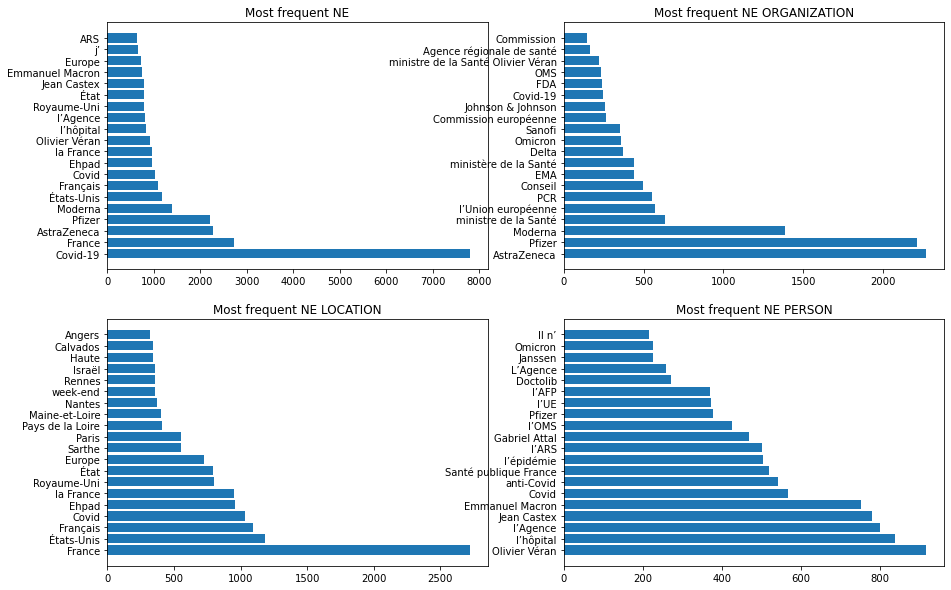

In [45]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')